<a href="https://colab.research.google.com/github/Noob919/Python_Basic/blob/main/pristine_pet_weight_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [3]:
df =  pd.read_csv("/content/PRISTINE PET MP.csv")
df.columns

Index(['time', 'tem', 'heating rate', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [4]:
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 3':"Weight loss", 'Unnamed: 4':"DTG",'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)

,time,tem,heating rate,Weight loss,DTG,label
4050,67.48333333,967.66,14.33924426,56.454816,-0.013943,Validation
4051,67.5,967.85,14.33851852,56.454816,-0.013939,Training
4052,67.51666667,967.97,14.33675636,56.454816,-0.013936,Training
4053,67.53333333,968.2,14.33662389,56.454816,-0.013933,Training
4054,67.55,968.41,14.33619541,56.454816,-0.013929,Training


In [11]:
df_res =  df_na[['time', 'tem', 'heating rate', 'Weight loss']]
df_res.tail(3)

,time,tem,heating rate,Weight loss
4052,67.51666667,967.97,14.33675636,56.454816
4053,67.53333333,968.2,14.33662389,56.454816
4054,67.55,968.41,14.33619541,56.454816


In [12]:
label = df_na['label']
label = label.reset_index()
label

,index,label
0,1,Training
1,2,Training
2,3,Validation
3,4,Training
4,5,Test
...,...,...
4049,4050,Validation
4050,4051,Training
4051,4052,Training
4052,4053,Training


In [13]:
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root']) 
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

In [14]:
transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'Weight loss']
transform_df

,time,tem,heating rate,Weight loss
0,0.000000e+00,0.950111,0.000000,0.311911
1,9.117128e-07,0.016664,0.999846,0.005470
2,3.645528e-06,0.033313,0.999385,0.010937
3,8.195068e-06,0.049931,0.998618,0.016390
4,1.455386e-05,0.066503,0.997547,0.021831
...,...,...,...,...
4049,6.944462e-02,0.995783,0.014756,0.058096
4050,6.944817e-02,0.995784,0.014752,0.058084
4051,6.945670e-02,0.995784,0.014749,0.058077
4052,6.945740e-02,0.995785,0.014745,0.058063


In [15]:
dataframe = pd.concat([transform_df,label],axis =1)
dataframe

,time,tem,heating rate,Weight loss,index,label
0,0.000000e+00,0.950111,0.000000,0.311911,1,Training
1,9.117128e-07,0.016664,0.999846,0.005470,2,Training
2,3.645528e-06,0.033313,0.999385,0.010937,3,Validation
3,8.195068e-06,0.049931,0.998618,0.016390,4,Training
4,1.455386e-05,0.066503,0.997547,0.021831,5,Test
...,...,...,...,...,...,...
4049,6.944462e-02,0.995783,0.014756,0.058096,4050,Validation
4050,6.944817e-02,0.995784,0.014752,0.058084,4051,Training
4051,6.945670e-02,0.995784,0.014749,0.058077,4052,Training
4052,6.945740e-02,0.995785,0.014745,0.058063,4053,Training


In [16]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']

In [17]:
from sklearn.tree import DecisionTreeRegressor
DTCLF = DecisionTreeRegressor()
DTCLF.fit(X,y)

DecisionTreeRegressor()

In [18]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']
predictions_val = DTCLF.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val

,0
0,0.005470
1,0.102818
2,0.128551
3,0.154860
4,0.188148
...,...
400,0.058415
401,0.058330
402,0.058205
403,0.058123


In [19]:
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 2.4188493366925544e-07
RMSE 0.0004918179883546915
MAE 0.00012483542451356764
R2_Score 0.9999530199838266


In [20]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)

In [21]:
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,Weight loss
0,0.000004,0.033313,0.999385,0.005470,0.010937
1,0.000311,0.300432,0.948733,0.102818,0.098216
2,0.000519,0.381624,0.915898,0.128551,0.124477


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


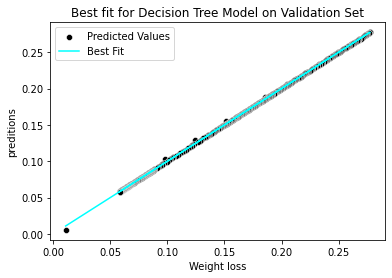

In [23]:
x = final_df['Weight loss']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'black', label = 'Predicted Values')
plt.plot(x, a*x+b, color='cyan', label = 'Best Fit') 
plt.title('Best fit for Decision Tree Model on Validation Set')
plt.legend()

In [24]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

In [25]:
predictions_test = DTCLF.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.016390
1,0.079148
2,0.116026
3,0.171169
4,0.193246
...,...
401,0.058396
402,0.058269
403,0.058262
404,0.058107


In [26]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 2.3801210371508796e-07
RMSE 0.00048786484164683146
MAE 0.00012305983922045118
R2_Score 0.9999537664851363


In [27]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
X_test_df

,time,tem,heating rate
0,0.000015,0.066503,0.997547
1,0.000224,0.256752,0.962819
2,0.000481,0.368694,0.921736
3,0.001133,0.536658,0.825627
4,0.001431,0.588983,0.785310
...,...,...,...
401,0.069163,0.995784,0.014903
402,0.069241,0.995785,0.014859
403,0.069262,0.995786,0.014848
404,0.069392,0.995785,0.014785


In [28]:
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,0.000015,0.066503,0.997547,0.016390,0.021831
1,0.000224,0.256752,0.962819,0.079148,0.084016
2,0.000481,0.368694,0.921736,0.116026,0.120283
3,0.001133,0.536658,0.825627,0.171169,0.174176
4,0.001431,0.588983,0.785310,0.193246,0.190749
...,...,...,...,...,...
401,0.069163,0.995784,0.014903,0.058396,0.058386
402,0.069241,0.995785,0.014859,0.058269,0.058278
403,0.069262,0.995786,0.014848,0.058262,0.058252
404,0.069392,0.995785,0.014785,0.058107,0.058115


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


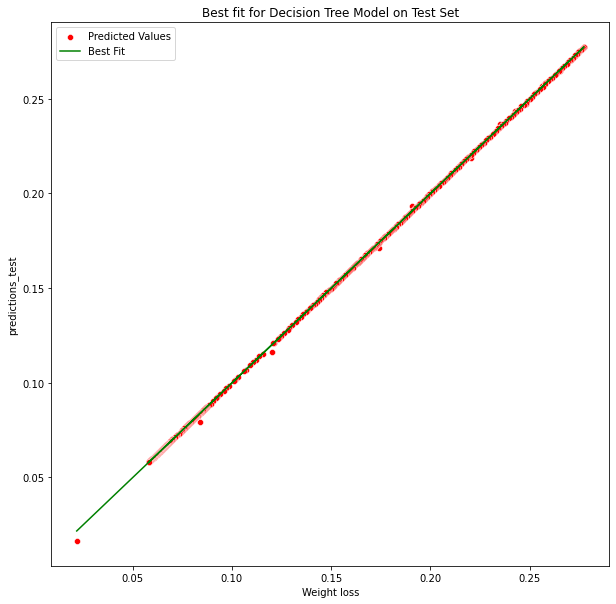

In [29]:
x = final_df_test['Weight loss']
y = final_df_test['predictions_test']
plt.figure(figsize=(10, 10))
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'Red', label = 'Predicted Values')
plt.plot(x, a*x+b, color='green', label = 'Best Fit') 
plt.title('Best fit for Decision Tree Model on Test Set')
plt.legend()

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rfc = RandomForestRegressor()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']


rfc.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']

predictions_val = rfc.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 1.502640898980026e-08
RMSE 0.00012258225397585192
MAE 3.6975603737866305e-05
R2_Score 0.9999970815009986


In [32]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,Weight loss
0,0.000004,0.033313,0.999385,0.011681,0.010937
1,0.000311,0.300432,0.948733,0.098263,0.098216
2,0.000519,0.381624,0.915898,0.126124,0.124477


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


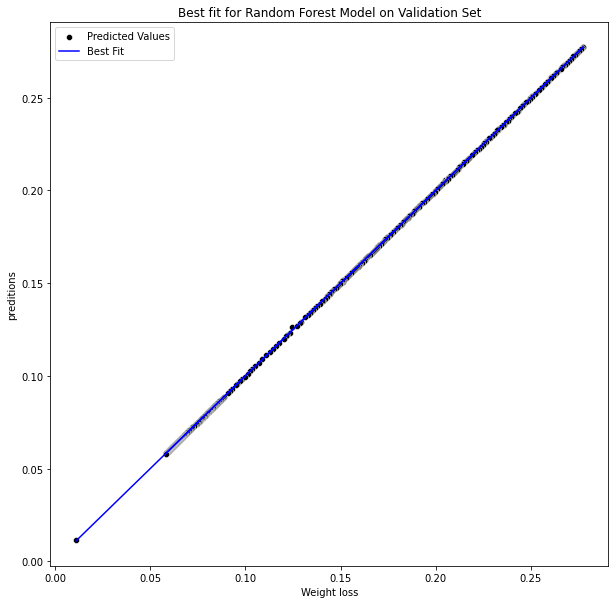

In [34]:
x = final_df['Weight loss']
y = final_df['preditions']
plt.figure(figsize=(10, 10))
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'black', label = 'Predicted Values')
plt.plot(x, a*x+b, color='Blue', label = 'Best Fit') 
plt.title('Best fit for Random Forest Model on Validation Set')
plt.legend()

In [35]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

predictions_test = rfc.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 4.5724876469736356e-08
RMSE 0.0002138337589571309
MAE 4.184432838603268e-05
R2_Score 0.9999911180073496


In [36]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,0.000015,0.066503,0.997547,0.021212,0.021831
1,0.000224,0.256752,0.962819,0.083344,0.084016
2,0.000481,0.368694,0.921736,0.116336,0.120283
3,0.001133,0.536658,0.825627,0.174184,0.174176
4,0.001431,0.588983,0.785310,0.191703,0.190749
...,...,...,...,...,...
401,0.069163,0.995784,0.014903,0.058380,0.058386
402,0.069241,0.995785,0.014859,0.058274,0.058278
403,0.069262,0.995786,0.014848,0.058257,0.058252
404,0.069392,0.995785,0.014785,0.058111,0.058115


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


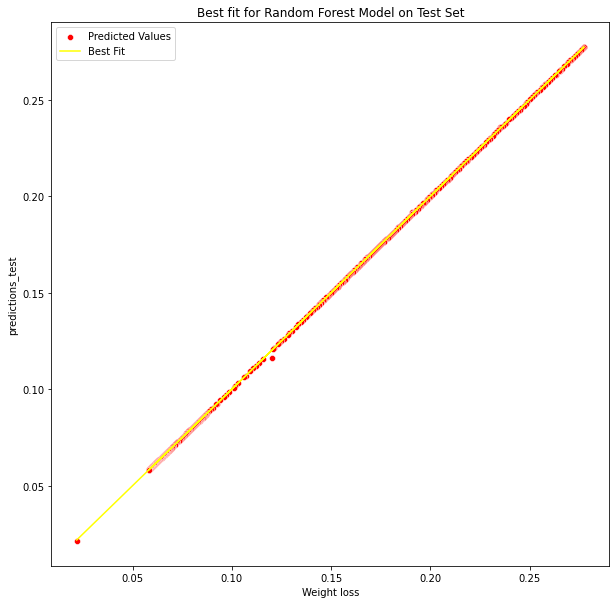

In [37]:
x = final_df_test['Weight loss']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x, y ,color = 'Red', label = 'Predicted Values')
plt.plot(x, a*x+b, color='yellow', label = 'Best Fit') 
plt.title('Best fit for Random Forest Model on Test Set')
plt.legend()

In [38]:
from sklearn.svm import SVR

svr = SVR()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['Weight loss']

svr.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['Weight loss']

predictions_val = svr.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 0.004745365066660842
RMSE 0.06888661021316728
MAE 0.05993133609205884
R2_Score 0.07833313882369852


In [39]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,Weight loss
0,0.000004,0.033313,0.999385,0.105329,0.010937
1,0.000311,0.300432,0.948733,0.119953,0.098216
2,0.000519,0.381624,0.915898,0.127157,0.124477


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


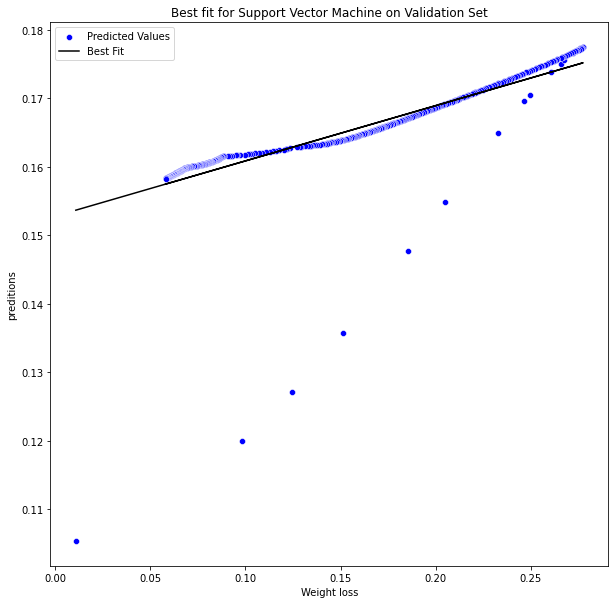

In [40]:
x = final_df['Weight loss']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x, y ,color = 'blue', label = 'Predicted Values')
plt.plot(x, a*x+b, color='black', label = 'Best Fit') 
plt.title('Best fit for Support Vector Machine on Validation Set')
plt.legend()

In [41]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['Weight loss']

predictions_test = svr.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 0.004750393961775093
RMSE 0.06892310180030418
MAE 0.060051154573396694
R2_Score 0.0772426846702069


In [42]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,Weight loss
0,0.000015,0.066503,0.997547,0.106350,0.021831
1,0.000224,0.256752,0.962819,0.116577,0.084016
2,0.000481,0.368694,0.921736,0.125934,0.120283
3,0.001133,0.536658,0.825627,0.143608,0.174176
4,0.001431,0.588983,0.785310,0.149644,0.190749
...,...,...,...,...,...
401,0.069163,0.995784,0.014903,0.158353,0.058386
402,0.069241,0.995785,0.014859,0.158334,0.058278
403,0.069262,0.995786,0.014848,0.158329,0.058252
404,0.069392,0.995785,0.014785,0.158298,0.058115


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


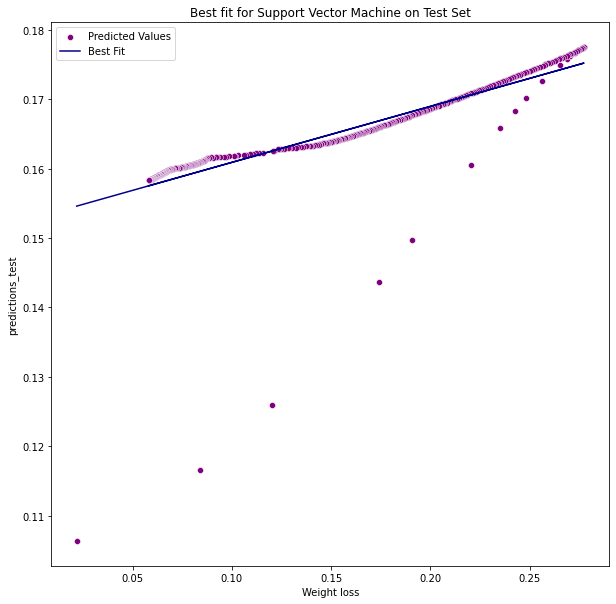

In [43]:
x = final_df_test['Weight loss']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
plt.figure(figsize=(10, 10))
sns.scatterplot(x, y ,color = 'purple', label = 'Predicted Values')
plt.plot(x, a*x+b, color='darkblue', label = 'Best Fit') 
plt.title('Best fit for Support Vector Machine on Test Set')
plt.legend()